<a href="https://colab.research.google.com/github/brianzhang9/Multivariate-time-series-forecasting-using-LSTM/blob/main/08_TensorFlow_2_0_%E5%9F%BA%E4%BA%8ELSTM%E5%AE%9E%E7%8E%B0%E5%A4%9A%E5%8F%98%E9%87%8F%E9%A2%84%E6%B5%8B_%E5%85%B1%E4%BA%AB%E5%8D%95%E8%BD%A6%E4%BD%BF%E7%94%A8%E9%87%8F%E9%A2%84%E6%B5%8B_%E4%BF%AE%E6%94%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils, losses
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("计算结果-滤波后.csv", parse_dates=['timestamp'], index_col=['timestamp'])

In [ ]:
dataset.shape

(1000, 15)

In [ ]:
dataset.head()

,Capacityh,Capacityz,Rz,Fz,Rg,Fg,Uc,T,Cc,Fri,Miu,Capacityh1,Capacityz1,Force-1,Force-2
timestamp,,,,,,,,,,,,,,,
0.12,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.105734,0.164000,32.5966,64.9,2158.43,1121.888
0.24,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.081175,0.173421,32.5966,64.9,2158.43,1121.888
0.36,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.102301,0.175764,32.5966,64.9,2158.43,1121.888
0.48,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.117952,0.176596,32.5966,64.9,2158.43,1121.888
0.60,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,1,21.00432,1.146566,0.177230,32.5966,64.9,2158.43,1121.888


In [ ]:
dataset.tail()

,Capacityh,Capacityz,Rz,Fz,Rg,Fg,Uc,T,Cc,Fri,Miu,Capacityh1,Capacityz1,Force-1,Force-2
timestamp,,,,,,,,,,,,,,,
119.52,0.031642,0.063078,24.720794,389.422667,8.445379,375.825508,1.223329,120,20.522166,0.744780,0.190299,31.641778,63.077778,1693.106667,879.319111
119.64,0.031597,0.062971,24.673911,389.283743,8.519499,376.247870,1.211940,120,20.530050,0.737264,0.190159,31.597343,62.971429,1688.688571,876.932571
119.76,0.031497,0.062780,24.589631,389.034004,8.645193,376.962966,1.191470,120,20.543151,0.723572,0.190644,31.497360,62.780000,1680.326000,872.639600
119.88,0.031797,0.063333,24.848283,389.816938,8.441866,375.799177,1.283682,120,20.521416,0.722281,0.190445,31.797300,63.333333,1706.933333,886.236000
120.00,0.031997,0.063700,25.010055,390.291456,8.436600,375.713809,1.312609,120,20.519848,0.784784,0.190625,31.997300,63.700000,1722.940000,894.324000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000 entries, 0.12 to 120.0
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Capacityh   1000 non-null   float64
 1   Capacityz   1000 non-null   float64
 2   Rz          1000 non-null   float64
 3   Fz          1000 non-null   float64
 4   Rg          1000 non-null   float64
 5   Fg          1000 non-null   float64
 6   Uc          1000 non-null   float64
 7   T           1000 non-null   int64  
 8   Cc          1000 non-null   float64
 9   Fri         1000 non-null   float64
 10  Miu         1000 non-null   float64
 11  Capacityh1  1000 non-null   float64
 12  Capacityz1  1000 non-null   float64
 13  Force-1     1000 non-null   float64
 14  Force-2     1000 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 125.0 KB


In [ ]:
dataset.describe()

,Capacityh,Capacityz,Rz,Fz,Rg,Fg,Uc,T,Cc,Fri,Miu,Capacityh1,Capacityz1,Force-1,Force-2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.032815,0.065369,26.105508,393.786743,10.105141,386.387287,3.566782,60.060000,20.728237,0.804203,0.187456,32.814520,65.369156,1852.303659,961.973337
std,0.000755,0.001468,1.001954,3.220962,1.000370,6.837667,4.460676,34.661475,0.136361,0.163206,0.002317,0.755182,1.468285,128.810018,66.996146
min,0.031357,0.062540,24.474708,388.686067,8.436600,375.713809,1.138593,0.000000,20.519848,0.722281,0.164000,31.357387,62.540000,1668.254000,866.568667
25%,0.032176,0.064120,25.230030,390.974874,9.218691,380.348816,1.425396,30.000000,20.608176,0.748213,0.186347,32.175587,64.120000,1745.298500,906.365167
50%,0.032767,0.065287,25.992543,393.365538,9.977257,385.201112,1.918476,60.000000,20.702721,0.754557,0.188019,32.766890,65.286667,1827.680666,949.071267
75%,0.033492,0.066662,26.861098,396.173859,10.877883,391.443575,3.143479,90.000000,20.827191,0.765584,0.189101,33.492012,66.661667,1929.420666,1001.988233
max,0.033970,0.067620,28.000000,400.000000,12.000000,400.000000,20.100000,120.000000,21.004320,1.503634,0.190644,33.970167,67.620000,2158.430000,1121.888000


## **可视化**

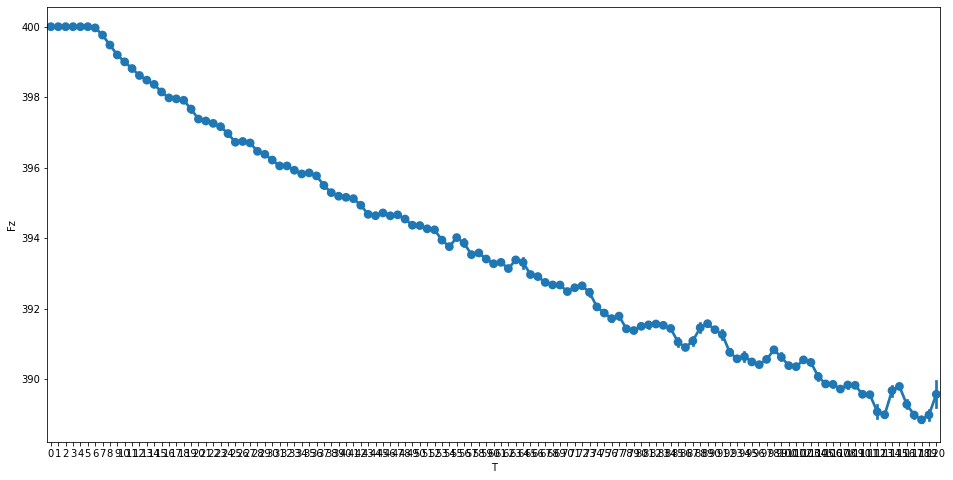

In [ ]:
plt.figure(figsize=(16,8))
sns.pointplot(x='T', y='Fz', data=dataset)
plt.show()

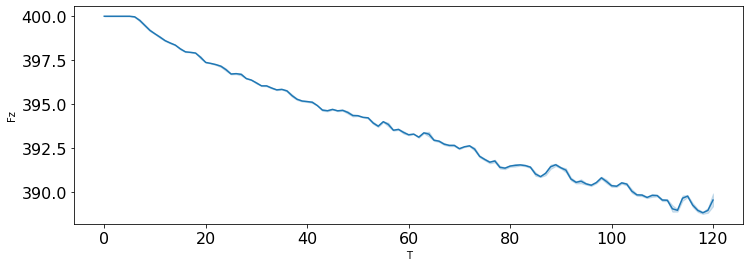

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x='T', y='Fz', data=dataset)
plt.tick_params(labelsize=16)
plt.savefig('Capacityh.svg',format='svg',dpi=150)
#fig=plt.figure()#创建画板
#fig.savefig('2.svg',format='svg',dpi=150)#输出
#之前的尺寸时8，3
#plt.ylim(850,1150)
plt.show()


## **数据预处理**

In [ ]:
dataset.head()

,Capacityh,Capacityz,Rz,Fz,Rg,Fg,Uc,T,Cc,Fri,Miu,Capacityh1,Capacityz1,Force-1,Force-2
timestamp,,,,,,,,,,,,,,,
0.12,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.105734,0.164000,32.5966,64.9,2158.43,1121.888
0.24,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.081175,0.173421,32.5966,64.9,2158.43,1121.888
0.36,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.102301,0.175764,32.5966,64.9,2158.43,1121.888
0.48,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,0,21.00432,1.117952,0.176596,32.5966,64.9,2158.43,1121.888
0.60,0.032597,0.0649,28.0,400.0,12.0,400.0,20.1,1,21.00432,1.146566,0.177230,32.5966,64.9,2158.43,1121.888


# **此处将重复变量删去**

In [ ]:
dataset.drop(columns=['Capacityh1', 'Capacityz', 'T', 'Fri', 'Miu', 'Capacityz1', 'Fz', 'Fg', 'Force-1','Capacityh'], axis=1, inplace=True)

In [ ]:
dataset.head()

,Rz,Rg,Uc,Cc,Force-2
timestamp,,,,,
0.12,28.0,12.0,20.1,21.00432,1121.888
0.24,28.0,12.0,20.1,21.00432,1121.888
0.36,28.0,12.0,20.1,21.00432,1121.888
0.48,28.0,12.0,20.1,21.00432,1121.888
0.60,28.0,12.0,20.1,21.00432,1121.888


In [ ]:
columns = ['Rz', 'Rg', 'Uc', 'Cc','Force-2']

for col in columns:
    scaler = MinMaxScaler()
    dataset[col] = scaler.fit_transform(dataset[col].values.reshape(-1,1))

In [ ]:
dataset.head()

,Rz,Rg,Uc,Cc,Force-2
timestamp,,,,,
0.12,1.0,1.0,1.0,1.0,1.0
0.24,1.0,1.0,1.0,1.0,1.0
0.36,1.0,1.0,1.0,1.0,1.0
0.48,1.0,1.0,1.0,1.0,1.0
0.60,1.0,1.0,1.0,1.0,1.0


## **特征工程**

In [ ]:
# 特征数据集

X = dataset.drop(columns=['Force-2'], axis=1) 

# 标签数据集

y = dataset['Force-2']

In [ ]:
X.shape

(1000, 4)

In [ ]:

y.shape

(1000,)

In [ ]:
# 1 数据集分离： X_train, X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=666)

In [ ]:
X_train.shape

(800, 4)

In [ ]:
y_train.shape

(800,)

In [ ]:
X_train.head()

,Rz,Rg,Uc,Cc
timestamp,,,,
0.12,1.0,1.0,1.0,1.0
0.24,1.0,1.0,1.0,1.0
0.36,1.0,1.0,1.0,1.0
0.48,1.0,1.0,1.0,1.0
0.60,1.0,1.0,1.0,1.0


In [ ]:
X_test.shape

(200, 4)

In [ ]:
y_test.shape

(200,)

In [ ]:
X_test.head()

,Rz,Rg,Uc,Cc
timestamp,,,,
96.12,0.154258,0.200167,0.010788,0.166641
96.24,0.166111,0.195222,0.011527,0.162103
96.36,0.159537,0.215503,0.010965,0.178255
96.48,0.153657,0.205807,0.010410,0.170357
96.60,0.176304,0.193309,0.012065,0.160621


注意，滑窗长度为10

In [ ]:
def create_dataset(X, y, seq_len=4):
    features = []
    targets = []
    
    for i in range(0, len(X) - seq_len, 1):
        data = X.iloc[i:i+seq_len] # 序列数据
        label = y.iloc[i+seq_len] # 标签数据
        # 保存到features和labels
        features.append(data)
        targets.append(label)
    
    # 返回
    return np.array(features), np.array(targets)

In [ ]:
train_dataset, train_labels = create_dataset(X_train, y_train, seq_len=4)

In [ ]:
train_dataset.shape

(796, 4, 4)

In [ ]:
train_labels.shape

(796,)

In [ ]:
test_dataset, test_labels = create_dataset(X_test, y_test, seq_len=4)

In [ ]:
test_dataset.shape

(196, 4, 4)

In [ ]:
test_labels.shape

(196,)

In [ ]:

def create_batch_dataset(X, y, train=True, buffer_size=1000, batch_size=256):
    batch_data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # 数据封装，tensor类型
    if train: # 训练集
        return batch_data.cache().shuffle(buffer_size).batch(batch_size)
    else: # 测试集
        return batch_data.batch(batch_size)

In [ ]:
train_batch_dataset = create_batch_dataset(train_dataset, train_labels)

In [ ]:
test_batch_dataset = create_batch_dataset(test_dataset, test_labels, train=False)

In [ ]:
list(test_batch_dataset.as_numpy_iterator())[0]

(array([[[0.1542582 , 0.20016677, 0.01078814, 0.16664149],
         [0.16611117, 0.19522241, 0.01152735, 0.1621028 ],
         [0.15953688, 0.2155032 , 0.0109645 , 0.17825464],
         [0.15365702, 0.20580674, 0.01041013, 0.17035656]],
 
        [[0.16611117, 0.19522241, 0.01152735, 0.1621028 ],
         [0.15953688, 0.2155032 , 0.0109645 , 0.17825464],
         [0.15365702, 0.20580674, 0.01041013, 0.17035656],
         [0.17630368, 0.19330853, 0.01206537, 0.16062105]],
 
        [[0.15953688, 0.2155032 , 0.0109645 , 0.17825464],
         [0.15365702, 0.20580674, 0.01041013, 0.17035656],
         [0.17630368, 0.19330853, 0.01206537, 0.16062105],
         [0.1702482 , 0.20060266, 0.01155173, 0.1669901 ]],
 
        ...,
 
        [[0.04049491, 0.03364166, 0.0029441 , 0.02994903],
         [0.05518711, 0.02441142, 0.003851  , 0.02182104],
         [0.06980576, 0.00246361, 0.00446888, 0.00478636],
         [0.05650686, 0.02326403, 0.00386823, 0.02105901]],
 
        [[0.05518711, 0.02441


## **模型搭建与训练**

In [ ]:
model = Sequential([
    layers.LSTM(units=256, input_shape=(4,4), return_sequences=True),
    layers.Dropout(0.4),
    layers.LSTM(units=256, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(units=128, return_sequences=True),
    layers.LSTM(units=32),
    layers.Dense(1)
])

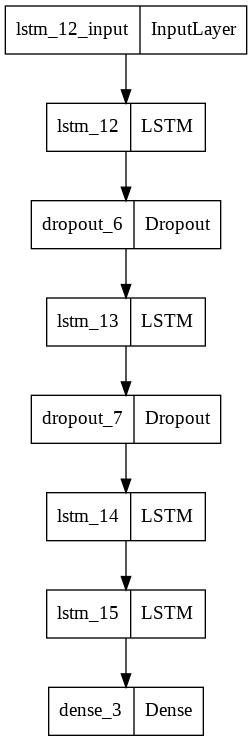

In [ ]:
utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam',
              loss='mse')

In [ ]:
# 保存模型权重文件和训练日志

!rm -rf logs

log_file = os.path.join('logs', datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

tensorboard_callback = TensorBoard(log_file)

In [ ]:
checkpoint_file = "best_model.hdf5"

checkpoint_callback = ModelCheckpoint(filepath=checkpoint_file, 
                                      monitor='loss',
                                      mode='min',
                                      save_best_only=True,
                                      save_weights_only=True)

In [ ]:
# 模型训练

history = model.fit(train_batch_dataset,
                    epochs=16,
                    validation_data=test_batch_dataset,
                    callbacks=[tensorboard_callback, checkpoint_callback])

Epoch 1/16
4/4 [==============================] - 27s 639ms/step - loss: 0.2255 - val_loss: 0.0012
Epoch 2/16
4/4 [==============================] - 1s 141ms/step - loss: 0.0741 - val_loss: 0.0412
Epoch 3/16
4/4 [==============================] - 1s 145ms/step - loss: 0.0466 - val_loss: 0.0196
Epoch 4/16
4/4 [==============================] - 1s 139ms/step - loss: 0.0136 - val_loss: 0.0078
Epoch 5/16
4/4 [==============================] - 1s 133ms/step - loss: 0.0254 - val_loss: 0.0118
Epoch 6/16
4/4 [==============================] - 1s 144ms/step - loss: 0.0094 - val_loss: 0.0219
Epoch 7/16
4/4 [==============================] - 1s 134ms/step - loss: 0.0113 - val_loss: 0.0169
Epoch 8/16
4/4 [==============================] - 1s 143ms/step - loss: 0.0050 - val_loss: 0.0076
Epoch 9/16
4/4 [==============================] - 1s 135ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 10/16
4/4 [==============================] - 1s 138ms/step - loss: 0.0019 - val_loss: 0.0059
Epoch 11/16
4/4 [=

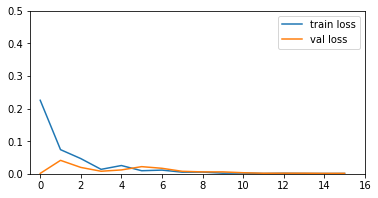

In [ ]:
# 显示训练结果

plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(loc='best')
plt.tick_params(labelsize=10)
plt.savefig('Performance.svg',format='svg',dpi=150)
plt.xlim(-0.5,16)
plt.ylim(0,0.5)
plt.show()

## **模型验证**

In [ ]:
test_dataset.shape

(196, 4, 4)

In [ ]:
test_preds = model.predict(test_dataset, verbose=1)

7/7 [==============================] - 2s 13ms/step


In [ ]:
test_preds.shape # 预测值shape

(196, 1)

In [ ]:
test_preds[:10]

array([[0.1477429 ],
       [0.14922002],
       [0.15074584],
       [0.14855358],
       [0.14898598],
       [0.14872195],
       [0.14717777],
       [0.14793772],
       [0.145535  ],
       [0.14320205]], dtype=float32)

In [ ]:
test_preds = test_preds[:, 0] # 获取列值

test_preds[:10]

array([0.1477429 , 0.14922002, 0.15074584, 0.14855358, 0.14898598,
       0.14872195, 0.14717777, 0.14793772, 0.145535  , 0.14320205],
      dtype=float32)

In [ ]:
test_preds.shape

(196,)

In [ ]:
test_labels.shape # 真值shape

(196,)

In [ ]:
test_labels[:10]

array([0.12813131, 0.1235556 , 0.1256894 , 0.1361448 , 0.13500584,
       0.12555519, 0.12132885, 0.12585024, 0.13626909, 0.13872144])

In [ ]:
score = r2_score(test_labels, test_preds)

print("r^2 值为： ", score)

r^2 值为：  0.12870688438042976


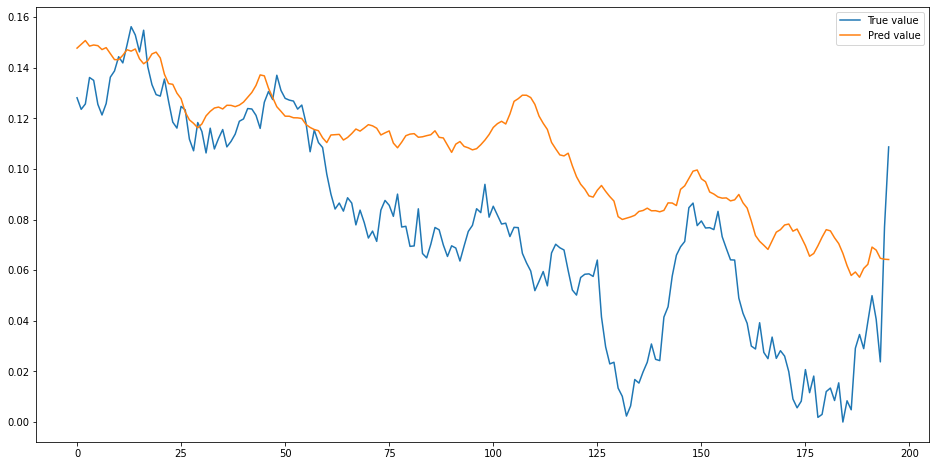

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(test_labels[:1000], label="True value")
plt.plot(test_preds[:1000], label="Pred value")
plt.legend(loc='best')
plt.show()

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码

In [ ]:
explainer = shap.DeepExplainer(history)


TypeError: ignored

In [ ]:
shap_values = explainer.shap_values(X_train)  # 传入特征矩阵X，计算SHAP值